<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_align_and_normalize_landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [1]:
# I do not why, but only older virsion is works.
# https://github.com/wkentaro/gdown/issues/43#issuecomment-1426653602
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
import gdown

url = "https://drive.google.com/uc?id=1LJDGEwr4zqpBftjqO9SiSOLgUcNhMiSe"
output = "gislr_top10.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1LJDGEwr4zqpBftjqO9SiSOLgUcNhMiSe
To: /content/gislr_top10.zip
100%|██████████| 880M/880M [00:10<00:00, 81.6MB/s]


'gislr_top10.zip'

In [3]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [4]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [5]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [6]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [7]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [8]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-01-29 06:30:01--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-01-29 06:30:01--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [          <=>       ]  72.82M  20.2MB/s    in 3.6s    

2024-01-29 06:30:05 (20.2 MB/s) - ‘master.zip’ saved [76357973]



In [9]:
!unzip -o master.zip -d master

Archive:  master.zip
82fd2fe37b40240399077e90589f1fe360d76568
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [10]:
!mv master/trado_samples-main/src/modules_gislr .

In [11]:
!rm -rf master master.zip gislr_top10.zip

In [12]:
!ls

dataset_top10  modules_gislr  sample_data


# 2. Load library

In [13]:
import json
import math
import sys
import time
from functools import partial
from pathlib import Path
from typing import (
    Any,
    Dict
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks,
    get_parts_connections
)
from modules_gislr.train_functions import (
    test_loop,
    train_loop,
    val_loop
)
from modules_gislr.draw_functions import (
    draw_tracking,
    showvideo_on_browser
)
from modules_gislr.layers import (
    SimpleISLR
)
from modules_gislr.transforms import (
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement preprocess

In [14]:
class AlignAndNormalize():
    def __init__(self,
                 face_head=0, face_num=76, face_origin=[0, 2], face_unit1=[7], face_unit2=[42],
                 lhand_head=76, lhand_num=21, lhand_origin=[0, 2, 5, 9, 13, 17], lhand_unit1=[0], lhand_unit2=[2, 5, 9, 13, 17],
                 pose_head=76+21, pose_num=12, pose_origin=[0, 1], pose_unit1=[0], pose_unit2=[1],
                 rhand_head=76+21+12, rhand_num=21, rhand_origin=[0, 2, 3, 9, 13, 17], rhand_unit1=[0], rhand_unit2=[2, 5, 9, 13, 17],
                 wo_norm=False) -> None:
        self.face_head = face_head
        self.face_num = face_num
        self.face_origin = face_origin
        self.face_unit1 = face_unit1
        self.face_unit2 = face_unit2

        self.lhand_head = lhand_head
        self.lhand_num = lhand_num
        self.lhand_origin = lhand_origin
        self.lhand_unit1 = lhand_unit1
        self.lhand_unit2 = lhand_unit2

        self.pose_head = pose_head
        self.pose_num = pose_num
        self.pose_origin = pose_origin
        self.pose_unit1 = pose_unit1
        self.pose_unit2 = pose_unit2

        self.rhand_head = rhand_head
        self.rhand_num = rhand_num
        self.rhand_origin = rhand_origin
        self.rhand_unit1 = rhand_unit1
        self.rhand_unit2 = rhand_unit2

        self.wo_norm = wo_norm

    def _normalize(self, feature, tmask, origin_lm, unit_lm1, unit_lm2,
                   unit_range=[1.0e-3, 5.0]):
        _feature = feature * tmask
        # `[C, T, J] -> [C, T, 1]`
        origin = feature[:, :, origin_lm].mean(axis=-1, keepdims=True)
        if self.wo_norm is False:
            # The frame-wise unit lengths are unstable.
            # So, we calculate average unit length.
            # Extract.
            unit1 = feature[:, :, unit_lm1].mean(axis=-1)
            unit2 = feature[:, :, unit_lm2].mean(axis=-1)
            # Mean square between target points.
            unit = np.sqrt((unit1 - unit2) ** 2)
            # Norm.
            unit = np.linalg.norm(unit, axis=0)
            # Calculate average removing undetected frame.
            unit = unit[unit > 0].mean()
            # Finally, clip extreme values.
            unit = np.clip(unit, a_min=unit_range[0], a_max=unit_range[1])
            unit = 1.0 if np.isnan(unit).any() else unit

        _feature = _feature - origin
        _feature = _feature / unit if self.wo_norm is False else _feature
        _feature = _feature * tmask
        return _feature

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:
        feature = data["feature"]
        tmask = feature == 0.0
        tmask = np.all(tmask, axis=(0, 2))
        tmask = np.logical_not(tmask.reshape([1, -1, 1]))

        if self.face_num > 0:
            face = feature[:, :, self.face_head: self.face_head+self.face_num]
            face = self._normalize(face, tmask, self.face_origin,
                                   self.face_unit1, self.face_unit2)
            feature[:, :, self.face_head: self.face_head+self.face_num] = face
        if self.lhand_num > 0:
            lhand = feature[:, :, self.lhand_head: self.lhand_head+self.lhand_num]
            lhand = self._normalize(lhand, tmask, self.lhand_origin,
                                    self.lhand_unit1, self.lhand_unit2)
            feature[:, :, self.lhand_head: self.lhand_head+self.lhand_num] = lhand
        if self.pose_num > 0:
            pose = feature[:, :, self.pose_head: self.pose_head+self.pose_num]
            pose = self._normalize(pose, tmask, self.pose_origin,
                                   self.pose_unit1, self.pose_unit2)
            feature[:, :, self.pose_head: self.pose_head+self.pose_num] = pose
        if self.rhand_num > 0:
            rhand = feature[:, :, self.rhand_head: self.rhand_head+self.rhand_num]
            rhand = self._normalize(rhand, tmask, self.rhand_origin,
                                    self.rhand_unit1, self.rhand_unit2)
            feature[:, :, self.rhand_head: self.rhand_head+self.rhand_num] = rhand
        data["feature"] = feature
        return data

In [15]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/49445.hdf5')]


In [16]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

## Define pre-transformations

In [17]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()

trans_align_whole = AlignAndNormalize(
                              face_num=0,
                              lhand_num=0,
                              pose_head=0, pose_num=len(use_landmarks), pose_origin=[76, 77], pose_unit1=[76], pose_unit2=[77],
                              rhand_num=0,
                              wo_norm=True)

trans_align_parts = AlignAndNormalize(wo_norm=True)

trans_align_norm_whole = AlignAndNormalize(
                              face_num=0,
                              lhand_num=0,
                              pose_head=0, pose_num=len(use_landmarks), pose_origin=[76, 77], pose_unit1=[76], pose_unit2=[77],
                              rhand_num=0,
                              wo_norm=np.False_)

trans_align_norm_parts = AlignAndNormalize(wo_norm=False)

In [18]:
pre_transforms_origin = Compose([trans_select_feature,
                                 trans_repnan])

pre_transforms_align_whole = Compose([trans_select_feature,
                                      trans_repnan,
                                      trans_align_whole])

pre_transforms_align_parts = Compose([trans_select_feature,
                                      trans_repnan,
                                      trans_align_parts])

pre_transforms_align_norm_whole = Compose([trans_select_feature,
                                           trans_repnan,
                                           trans_align_norm_whole])

pre_transforms_align_norm_parts = Compose([trans_select_feature,
                                           trans_repnan,
                                           trans_align_norm_parts])

transforms = Compose([ToTensor()])

## Original landmarks

In [19]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms_origin, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 60, 130])


## Aligned landmarks (whole body)

In [20]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms_align_whole, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_align_w = data["feature"]

    print(feature_align_w.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 60, 130])


## Aligned landmarks (parts-based)

In [21]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms_align_parts, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_align_p = data["feature"]

    print(feature_align_p.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 60, 130])


## Aligned and normalized landmarks (whole body)

In [22]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms_align_norm_whole, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_align_norm_w = data["feature"]

    print(feature_align_norm_w.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 60, 130])


## Aligned and normalized landmarks (parts-based)

In [23]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms_align_norm_parts, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_align_norm_p = data["feature"]

    print(feature_align_norm_p.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 60, 130])


<ipython-input-14-97743c680dd1>:50: RuntimeWarning: Mean of empty slice.
  unit = unit[unit > 0].mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


# 4. Check normalized landmarks

In [24]:
feature_origin = feature_origin.detach().cpu().numpy()
feature_align_w = feature_align_w.detach().cpu().numpy()
feature_align_p = feature_align_p.detach().cpu().numpy()
feature_align_norm_w = feature_align_norm_w.detach().cpu().numpy()
feature_align_norm_p = feature_align_norm_p.detach().cpu().numpy()

_, use_landmarks = get_fullbody_landmarks()
_, face_connections = get_parts_connections(use_landmarks, "face")
_, lhand_connections = get_parts_connections(use_landmarks, "lhand")
_, pose_connections = get_parts_connections(use_landmarks, "pose")
_, rhand_connections = get_parts_connections(use_landmarks, "rhand")

## Original landmarks

In [25]:
outpath = "./track_origin.mp4"
draw_tracking(feature_origin, outpath,
              face_connections=face_connections,
              lhand_connections=lhand_connections,
              pose_connections=pose_connections,
              rhand_connections=rhand_connections,
              channel_first=True)

Window size: 500 568
Offsets: 0 0


In [26]:
# The MP4 file generated by OpenCV can not display correctly.
# So I convert it into WEBM file.
!ffmpeg -i track_origin.mp4 -vcodec vp9 -y track_origin.webm

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [27]:
showvideo_on_browser(outpath.replace(".mp4", ".webm"))

## Aligned landmarks (whole body)

In [28]:
outpath = "./track_align_w.mp4"
draw_tracking(feature_align_w, outpath,
              face_connections=face_connections,
              lhand_connections=lhand_connections,
              pose_connections=pose_connections,
              rhand_connections=rhand_connections,
              channel_first=True)

Window size: 726 835
Offsets: 226 335


In [29]:
# The MP4 file generated by OpenCV can not display correctly.
# So I convert it into WEBM file.
!ffmpeg -i track_align_w.mp4 -vcodec vp9 -y track_align_w.webm

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [30]:
showvideo_on_browser(outpath.replace(".mp4", ".webm"))

## Aligned landmarks (parts-based)

In [31]:
outpath = "./track_align_p.mp4"
draw_tracking(feature_align_p, outpath,
              face_connections=face_connections,
              lhand_connections=lhand_connections,
              pose_connections=pose_connections,
              rhand_connections=rhand_connections,
              channel_first=True)

Window size: 666 601
Offsets: 166 101


In [32]:
# The MP4 file generated by OpenCV can not display correctly.
# So I convert it into WEBM file.
!ffmpeg -i track_align_p.mp4 -vcodec vp9 -y track_align_p.webm

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [33]:
showvideo_on_browser(outpath.replace(".mp4", ".webm"))

## Aligned and normalized landmarks (whole body)



In [34]:
outpath = "./track_align_norm_w.mp4"
draw_tracking(feature_align_norm_w, outpath,
              face_connections=face_connections,
              lhand_connections=lhand_connections,
              pose_connections=pose_connections,
              rhand_connections=rhand_connections,
              channel_first=True)

Window size: 726 835
Offsets: 226 335


In [35]:
# The MP4 file generated by OpenCV can not display correctly.
# So I convert it into WEBM file.
!ffmpeg -i track_align_norm_w.mp4 -vcodec vp9 -y track_align_norm_w.webm

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [36]:
showvideo_on_browser(outpath.replace(".mp4", ".webm"))

## Aligned and normalized landmarks (parts-based)

In [37]:
outpath = "./track_align_norm_p.mp4"
draw_tracking(feature_align_norm_p, outpath,
              face_connections=face_connections,
              lhand_connections=lhand_connections,
              pose_connections=pose_connections,
              rhand_connections=rhand_connections,
              channel_first=True)

Window size: 1241 1517
Offsets: 741 971


In [38]:
# The MP4 file generated by OpenCV can not display correctly.
# So I convert it into WEBM file.
!ffmpeg -i track_align_norm_p.mp4 -vcodec vp9 -y track_align_norm_p.webm

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [39]:
showvideo_on_browser(outpath.replace(".mp4", ".webm"))

# 5. Train and evaluation

In [40]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = 1

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using cpu for computation.


## Train with original landmarks (selection only).

In [41]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
out_channels = VOCAB

model = SimpleISLR(in_channels, out_channels)
print(model)

# Sanity check.
logit = model(torch.from_numpy(feature_origin))
print(logit.shape)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

SimpleISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


In [42]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms_origin,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms_origin,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms_origin,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers)

In [43]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_origin = np.array(val_losses)
test_accs_origin = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_origin.min()} at {np.argmin(val_losses_origin)+1} epoch.")
print(f"Maximum accuracy:{test_accs_origin.max()} at {np.argmax(test_accs_origin)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.331726 [    0/ 3881]
loss:2.236875 [ 3200/ 3881]
Done. Time:3.705849924000006
Start validation.
Done. Time:0.3287669430000051
Validation performance: 
 Avg loss:2.278495

Start evaluation.
Done. Time:0.9095884390000037
Test performance: 
 Accuracy:9.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.227861 [    0/ 3881]
loss:2.155724 [ 3200/ 3881]
Done. Time:4.585205226999989
Start validation.
Done. Time:0.2982493149999925
Validation performance: 
 Avg loss:2.236385

Start evaluation.
Done. Time:0.9074343100000135
Test performance: 
 Accuracy:15.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.173045 [    0/ 3881]
loss:2.097388 [ 3200/ 3881]
Done. Time:3.5639839529999904
Start validation.
Done. Time:0.3026500160000012
Validation per

## Train with aligned landmarks (whole body).

In [44]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
out_channels = VOCAB

model = SimpleISLR(in_channels, out_channels)
print(model)

# Sanity check.
logit = model(torch.from_numpy(feature_align_w))
print(logit.shape)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

SimpleISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


In [45]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms_align_whole,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms_align_whole,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms_align_whole,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers)

In [46]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_align_w = np.array(val_losses)
test_accs_align_w = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_align_w.min()} at {np.argmin(val_losses_align_w)+1} epoch.")
print(f"Maximum accuracy:{test_accs_align_w.max()} at {np.argmax(test_accs_align_w)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.280617 [    0/ 3881]
loss:2.254807 [ 3200/ 3881]
Done. Time:4.57678570600001
Start validation.
Done. Time:0.3523293260000173
Validation performance: 
 Avg loss:2.167554

Start evaluation.
Done. Time:0.9390861919999907
Test performance: 
 Accuracy:22.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.178322 [    0/ 3881]
loss:2.199979 [ 3200/ 3881]
Done. Time:4.182966315000044
Start validation.
Done. Time:0.5400019389999784
Validation performance: 
 Avg loss:2.071646

Start evaluation.
Done. Time:1.1207076300000267
Test performance: 
 Accuracy:29.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.077059 [    0/ 3881]
loss:2.144530 [ 3200/ 3881]
Done. Time:3.7685206009999774
Start validation.
Done. Time:0.34313756899996406
Validation pe

## Train with aligned landmarks (parts-based)

In [47]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
out_channels = VOCAB

model = SimpleISLR(in_channels, out_channels)
print(model)

# Sanity check.
logit = model(torch.from_numpy(feature_align_w))
print(logit.shape)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

SimpleISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


In [48]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms_align_parts,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms_align_parts,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms_align_parts,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers)

In [49]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_align_p = np.array(val_losses)
test_accs_align_p = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_align_p.min()} at {np.argmin(val_losses_align_p)+1} epoch.")
print(f"Maximum accuracy:{test_accs_align_p.max()} at {np.argmax(test_accs_align_p)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.304863 [    0/ 3881]
loss:2.261430 [ 3200/ 3881]
Done. Time:3.5605471029999762
Start validation.
Done. Time:0.4809091529999705
Validation performance: 
 Avg loss:2.281503

Start evaluation.
Done. Time:1.486718355999983
Test performance: 
 Accuracy:17.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.257545 [    0/ 3881]
loss:2.202615 [ 3200/ 3881]
Done. Time:3.8056037420000166
Start validation.
Done. Time:0.35773847999996633
Validation performance: 
 Avg loss:2.239504

Start evaluation.
Done. Time:1.0263694029999897
Test performance: 
 Accuracy:20.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.187760 [    0/ 3881]
loss:2.144967 [ 3200/ 3881]
Done. Time:3.574448929999903
Start validation.
Done. Time:0.3604202459999897
Validation p

## Train with aligned and normalized landmarks (whole body)

In [50]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
out_channels = VOCAB

model = SimpleISLR(in_channels, out_channels)
print(model)

# Sanity check.
logit = model(torch.from_numpy(feature_align_norm_w))
print(logit.shape)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

SimpleISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


In [51]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms_align_norm_whole,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms_align_norm_whole,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms_align_norm_whole,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers)

In [52]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_align_norm_w = np.array(val_losses)
test_accs_align_norm_w = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_align_norm_w.min()} at {np.argmin(val_losses_align_norm_w)+1} epoch.")
print(f"Maximum accuracy:{test_accs_align_norm_w.max()} at {np.argmax(test_accs_align_norm_w)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.317579 [    0/ 3881]
loss:2.225214 [ 3200/ 3881]
Done. Time:4.283512410999947
Start validation.
Done. Time:0.5344394080000257
Validation performance: 
 Avg loss:2.144294

Start evaluation.
Done. Time:1.048437616000001
Test performance: 
 Accuracy:25.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.175407 [    0/ 3881]
loss:2.171779 [ 3200/ 3881]
Done. Time:3.5809837220001555
Start validation.
Done. Time:0.31416805200001363
Validation performance: 
 Avg loss:2.069317

Start evaluation.
Done. Time:0.987083845999905
Test performance: 
 Accuracy:33.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:2.073561 [    0/ 3881]
loss:2.131669 [ 3200/ 3881]
Done. Time:3.519444169000053
Start validation.
Done. Time:0.3534758849998525
Validation per

## Train aligned and normalized landmarks (parts-based)

In [53]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
out_channels = VOCAB

model = SimpleISLR(in_channels, out_channels)
print(model)

# Sanity check.
logit = model(torch.from_numpy(feature_align_norm_w))
print(logit.shape)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

SimpleISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=64, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


In [54]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms_align_norm_parts,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms_align_norm_parts,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms_align_norm_parts,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers)

<ipython-input-14-97743c680dd1>:50: RuntimeWarning: Mean of empty slice.
  unit = unit[unit > 0].mean()


In [55]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_align_norm_p = np.array(val_losses)
test_accs_align_norm_p = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_align_norm_p.min()} at {np.argmin(val_losses_align_norm_p)+1} epoch.")
print(f"Maximum accuracy:{test_accs_align_norm_p.max()} at {np.argmax(test_accs_align_norm_p)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.308338 [    0/ 3881]
loss:2.134595 [ 3200/ 3881]
Done. Time:3.5167490670000916
Start validation.
Done. Time:0.34448619199997665
Validation performance: 
 Avg loss:2.146439

Start evaluation.
Done. Time:1.0277472860000216
Test performance: 
 Accuracy:27.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.987757 [    0/ 3881]
loss:2.037375 [ 3200/ 3881]
Done. Time:4.143803685999956
Start validation.
Done. Time:0.5656715479999548
Validation performance: 
 Avg loss:2.032194

Start evaluation.
Done. Time:1.1175596299999597
Test performance: 
 Accuracy:36.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.795411 [    0/ 3881]
loss:1.969030 [ 3200/ 3881]
Done. Time:3.525702655000032
Start validation.
Done. Time:0.3248787049999464
Validation p

## Plot results

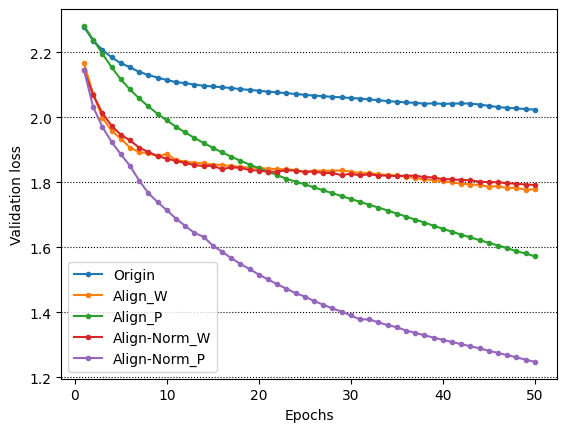

In [56]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_origin)+1)
plt.plot(xs, val_losses_origin, label="Origin", marker=".")
plt.plot(xs, val_losses_align_w, label="Align_W", marker=".")
plt.plot(xs, val_losses_align_p, label="Align_P", marker=".")
plt.plot(xs, val_losses_align_norm_w, label="Align-Norm_W", marker=".")
plt.plot(xs, val_losses_align_norm_p, label="Align-Norm_P", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

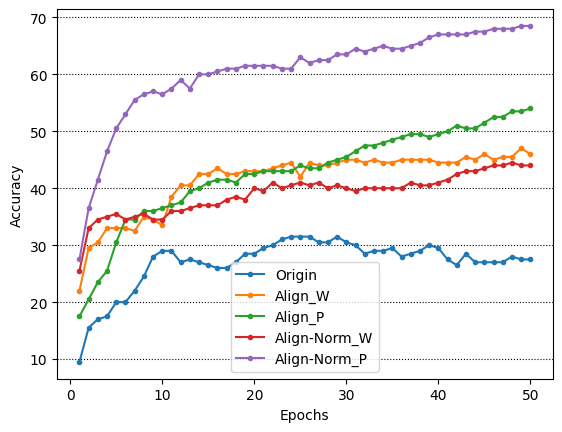

In [57]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs)+1)
ys = test_accs
plt.plot(xs, test_accs_origin, label="Origin", marker=".")
plt.plot(xs, test_accs_align_w, label="Align_W", marker=".")
plt.plot(xs, test_accs_align_p, label="Align_P", marker=".")
plt.plot(xs, test_accs_align_norm_w, label="Align-Norm_W", marker=".")
plt.plot(xs, test_accs_align_norm_p, label="Align-Norm_P", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()